In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import json
import requests
import hvplot.pandas

#Import API Key
from config import geoapify_key

#Import CSV File
airlineData = "T_ONTIME_MARKETING.csv"
airlineData = pd.read_csv(airlineData, encoding="utf-8", dtype=object)
cleanAirlineData = cleanAirlineData = airlineData[["ORIGIN_CITY_NAME", "ORIGIN_STATE_ABR", "DEST_CITY_NAME", "DEST_STATE_ABR", "CRS_DEP_TIME",
                                                    "DEP_TIME", "DEP_DELAY", "TAXI_OUT", "TAXI_IN", "ARR_TIME", "ARR_DELAY", "CANCELLED", 
                                                    "CANCELLATION_CODE", "DIVERTED", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "DIV_AIRPORT_LANDINGS", "DIV_ACTUAL_ELAPSED_TIME"]]
cleanAirlineData



,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_ACTUAL_ELAPSED_TIME
0,"New York, NY",NY,"Los Angeles, CA",CA,0900,0852,-8.00,18.00,5.00,1124,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0,NaN
1,"Los Angeles, CA",CA,"New York, NY",NY,1235,1232,-3.00,17.00,12.00,2107,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0,NaN
2,"Boston, MA",MA,"Los Angeles, CA",CA,1800,1754,-6.00,18.00,8.00,2041,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0,NaN
3,"Los Angeles, CA",CA,"Boston, MA",MA,0750,0742,-8.00,20.00,15.00,1638,...,0.00,NaN,0.00,0.00,0.00,19.00,0.00,0.00,0,NaN
4,"Phoenix, AZ",AZ,"Portland, OR",OR,1502,1458,-4.00,22.00,5.00,1654,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582420,"Phoenix, AZ",AZ,"Los Angeles, CA",CA,1200,1203,3.00,12.00,5.00,1218,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0,NaN
582421,"Seattle, WA",WA,"Denver, CO",CO,1800,1842,42.00,15.00,5.00,2218,...,0.00,NaN,0.00,0.00,0.00,6.00,0.00,42.00,0,NaN
582422,"Orlando, FL",FL,"Austin, TX",TX,0705,0703,-2.00,18.00,4.00,0907,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0,NaN
582423,"Los Angeles, CA",CA,"Sacramento, CA",CA,1315,1430,75.00,15.00,3.00,1549,...,0.00,NaN,0.00,69.00,0.00,0.00,0.00,0.00,0,NaN


## Los Angeles Airport (LAX) DataFrame

In [49]:
lax_data = cleanAirlineData.loc[(cleanAirlineData["ORIGIN_CITY_NAME"] == "Los Angeles, CA") |
(cleanAirlineData["DEST_CITY_NAME"] == "Los Angeles, CA")].reset_index(drop=True)
lax_data

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_ACTUAL_ELAPSED_TIME
0,"New York, NY",NY,"Los Angeles, CA",CA,0900,0852,-8.00,18.00,5.00,1124,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0,NaN
1,"Los Angeles, CA",CA,"New York, NY",NY,1235,1232,-3.00,17.00,12.00,2107,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0,NaN
2,"Boston, MA",MA,"Los Angeles, CA",CA,1800,1754,-6.00,18.00,8.00,2041,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0,NaN
3,"Los Angeles, CA",CA,"Boston, MA",MA,0750,0742,-8.00,20.00,15.00,1638,...,0.00,NaN,0.00,0.00,0.00,19.00,0.00,0.00,0,NaN
4,"Los Angeles, CA",CA,"New York, NY",NY,0610,0605,-5.00,19.00,10.00,1433,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30669,"Los Angeles, CA",CA,"Phoenix, AZ",AZ,1720,1716,-4.00,18.00,5.00,1935,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0,NaN
30670,"Phoenix, AZ",AZ,"Los Angeles, CA",CA,2035,2029,-6.00,17.00,13.00,2112,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0,NaN
30671,"Tucson, AZ",AZ,"Los Angeles, CA",CA,1725,1805,40.00,9.00,7.00,1831,...,0.00,NaN,0.00,4.00,0.00,0.00,0.00,22.00,0,NaN
30672,"Phoenix, AZ",AZ,"Los Angeles, CA",CA,1200,1203,3.00,12.00,5.00,1218,...,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0,NaN


In [50]:
#Comparison of Delay Reasons 
lax_delay = lax_data.loc[(lax_data["DEP_DELAY"].astype(float) > 0.0) | (lax_data["ARR_DELAY"].astype(float) > 0.0)]
lax_delay = lax_delay[["ORIGIN_CITY_NAME", "ORIGIN_STATE_ABR", "DEST_CITY_NAME", "DEST_STATE_ABR", "DEP_DELAY",
                        "TAXI_OUT", "TAXI_IN", "ARR_DELAY", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY",
                        "LATE_AIRCRAFT_DELAY", "DIV_ACTUAL_ELAPSED_TIME", "CANCELLED", "DIVERTED"]].fillna(0.0)
lax_delay

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_ACTUAL_ELAPSED_TIME,CANCELLED,DIVERTED
1,"Los Angeles, CA",CA,"New York, NY",NY,-3.00,17.00,12.00,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
3,"Los Angeles, CA",CA,"Boston, MA",MA,-8.00,20.00,15.00,19.00,0.00,0.00,19.00,0.00,0.00,0.0,0.00,0.00
5,"New York, NY",NY,"Los Angeles, CA",CA,14.00,18.00,8.00,-27.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
8,"Boston, MA",MA,"Los Angeles, CA",CA,115.00,25.00,15.00,92.00,92.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
12,"Los Angeles, CA",CA,"Boston, MA",MA,-2.00,13.00,6.00,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30664,"Los Angeles, CA",CA,"Baltimore, MD",MD,25.00,7.00,4.00,21.00,21.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
30670,"Phoenix, AZ",AZ,"Los Angeles, CA",CA,-6.00,17.00,13.00,7.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
30671,"Tucson, AZ",AZ,"Los Angeles, CA",CA,40.00,9.00,7.00,26.00,4.00,0.00,0.00,0.00,22.00,0.0,0.00,0.00
30672,"Phoenix, AZ",AZ,"Los Angeles, CA",CA,3.00,12.00,5.00,-17.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00


## Type of Delays at LAX

In [51]:
# Collect flight info for delay types/reason
# Create a new DataFrame with only the delay columns
delay_columns = ["CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]
delay_data = lax_delay[delay_columns]

# Convert delay column values to numeric
delay_data = delay_data.apply(pd.to_numeric, errors='coerce')

# Filter rows where all delay columns are 0.0
all_zero_rows = delay_data[delay_data.eq(0.0).all(axis=1)]

# Print the number of rows with all delay columns as 0.0
num_all_zero_rows = all_zero_rows.shape[0]
print(f"Number of rows with all delay columns as 0.0: {num_all_zero_rows}")

# Obtain counts for delay types based on delay type columns with a value greater than 0.0 for each row
delay_counts = {"CARRIER_DELAY": 0, "WEATHER_DELAY": 0, "NAS_DELAY": 0, "SECURITY_DELAY": 0, "LATE_AIRCRAFT_DELAY": 0}

for index, row in delay_data.iterrows():
    for col in delay_columns:
        if row[col] > 0.0:
            delay_counts[col] += 1

print("Counts for delay types based on delay type columns with a value greater than 0.0 for each row:")
for key, value in delay_counts.items():
    print(f"{key}: {value}")

Number of rows with all delay columns as 0.0: 8302
Counts for delay types based on delay type columns with a value greater than 0.0 for each row:
CARRIER_DELAY: 3293
WEATHER_DELAY: 341
NAS_DELAY: 2882
SECURITY_DELAY: 45
LATE_AIRCRAFT_DELAY: 2340


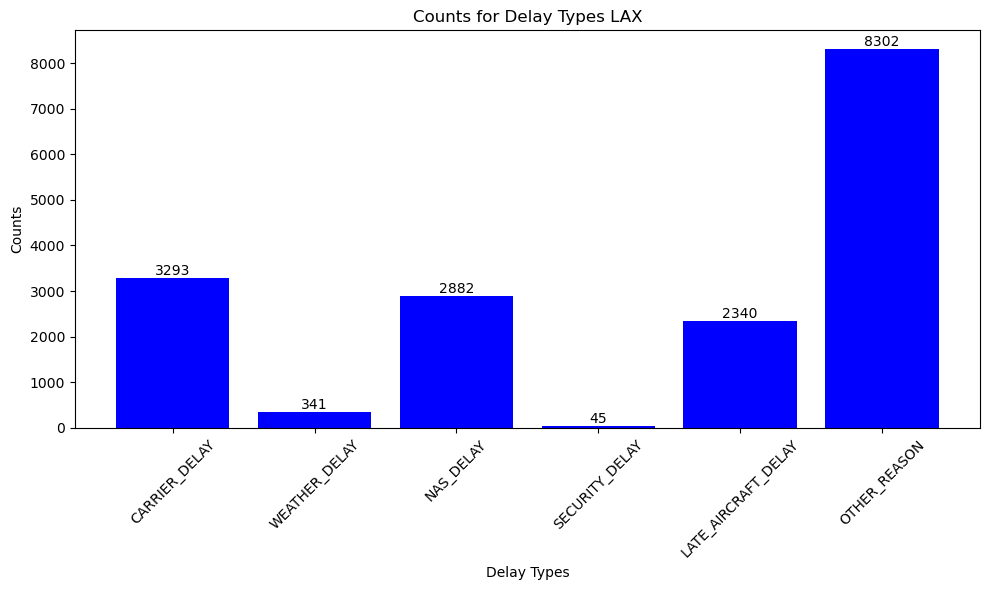

In [52]:
# Create a Bar Chart showing the different types of delays

# Convert delay column values to numeric
lax_delay['CARRIER_DELAY'] = pd.to_numeric(lax_delay['CARRIER_DELAY'], errors='coerce')
lax_delay['WEATHER_DELAY'] = pd.to_numeric(lax_delay['WEATHER_DELAY'], errors='coerce')
lax_delay['NAS_DELAY'] = pd.to_numeric(lax_delay['NAS_DELAY'], errors='coerce')
lax_delay['SECURITY_DELAY'] = pd.to_numeric(lax_delay['SECURITY_DELAY'], errors='coerce')
lax_delay['LATE_AIRCRAFT_DELAY'] = pd.to_numeric(lax_delay['LATE_AIRCRAFT_DELAY'], errors='coerce')

# Calculate the counts for each delay type
count_carrier_delay = len(lax_delay[lax_delay['CARRIER_DELAY'] > 0.0])
count_weather_delay = len(lax_delay[lax_delay['WEATHER_DELAY'] > 0.0])
count_nas_delay = len(lax_delay[lax_delay['NAS_DELAY'] > 0.0])
count_security_delay = len(lax_delay[lax_delay['SECURITY_DELAY'] > 0.0])
count_late_aircraft_delay = len(lax_delay[lax_delay['LATE_AIRCRAFT_DELAY'] > 0.0])

# Calculate the count for rows with all delay columns as 0.0
num_all_zero_rows = len(lax_delay[(lax_delay['CARRIER_DELAY'] == 0.0) & 
                        (lax_delay['WEATHER_DELAY'] == 0.0) & (lax_delay['NAS_DELAY'] == 0.0) & 
                        (lax_delay['SECURITY_DELAY'] == 0.0) & (lax_delay['LATE_AIRCRAFT_DELAY'] == 0.0)])

# Create the delay_counts dictionary including the "Other reason" category
delay_counts = {
    "CARRIER_DELAY": count_carrier_delay,
    "WEATHER_DELAY": count_weather_delay,
    "NAS_DELAY": count_nas_delay,
    "SECURITY_DELAY": count_security_delay,
    "LATE_AIRCRAFT_DELAY": count_late_aircraft_delay,
    "OTHER_REASON": num_all_zero_rows
}

# Create a list of delay types and their corresponding counts
delay_types = list(delay_counts.keys())
delay_counts_values = list(delay_counts.values())

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(delay_types, delay_counts_values, color='blue')

# Add annotations for each bar with the corresponding counts
for bar, count in zip(bars, delay_counts_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

plt.xlabel('Delay Types')
plt.ylabel('Counts')
plt.title('Counts for Delay Types LAX')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart
plt.savefig('delay_type_counts_chart.png', format='png')
plt.show()

## Time of Delays

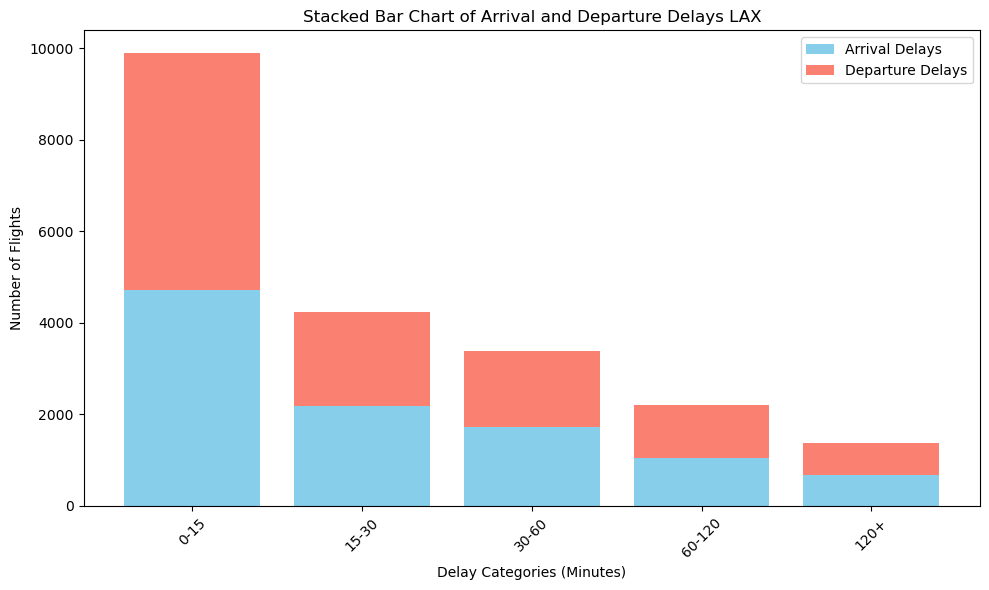

In [53]:
# Function to bin delays
def bin_delays(df, delay_column):
    df[delay_column] = pd.to_numeric(df[delay_column], errors='coerce')
    delays = df[delay_column][df[delay_column] > 0]
    bins = [0, 15, 30, 60, 120, float('inf')]
    labels = ['0-15', '15-30', '30-60', '60-120', '120+']
    return pd.cut(delays, bins=bins, labels=labels, right=False)


# Apply the function to bin delays
lax_delay['arrival_delay_bin'] = bin_delays(lax_delay, 'ARR_DELAY')
lax_delay['departure_delay_bin'] = bin_delays(lax_delay, 'DEP_DELAY')



# Aggregate data for plotting
arrival_counts = lax_delay['arrival_delay_bin'].value_counts().sort_index()
departure_counts = lax_delay['departure_delay_bin'].value_counts().sort_index()

# Ensure all categories are included in both series
all_categories = arrival_counts.index.union(departure_counts.index)
arrival_counts = arrival_counts.reindex(all_categories, fill_value=0)
departure_counts = departure_counts.reindex(all_categories, fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked bar chart
ax.bar(all_categories, arrival_counts, label='Arrival Delays', color='skyblue')
ax.bar(all_categories, departure_counts, bottom=arrival_counts, label='Departure Delays', color='salmon')

# Add labels and title
ax.set_xlabel('Delay Categories (Minutes)')
ax.set_ylabel('Number of Flights')
ax.set_title('Stacked Bar Chart of Arrival and Departure Delays LAX')
ax.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('stacked_bar_chart.png', format='png')
plt.show()


In [54]:
# Number of flights per delay bin
arrival_counts = lax_delay['arrival_delay_bin'].value_counts().sort_index()
print("Arrival Delays Counts:")
for label, count in arrival_counts.items():
    print(f"{label}: {count}")

departure_counts = lax_delay['departure_delay_bin'].value_counts().sort_index()
print("\nDeparture Delays Counts:")
for label, count in departure_counts.items():
    print(f"{label}: {count}")

Arrival Delays Counts:
0-15: 4710
15-30: 2178
30-60: 1717
60-120: 1058
120+: 687

Departure Delays Counts:
0-15: 5184
15-30: 2049
30-60: 1671
60-120: 1145
120+: 696


## Cancellation vs Diverted vs Delay

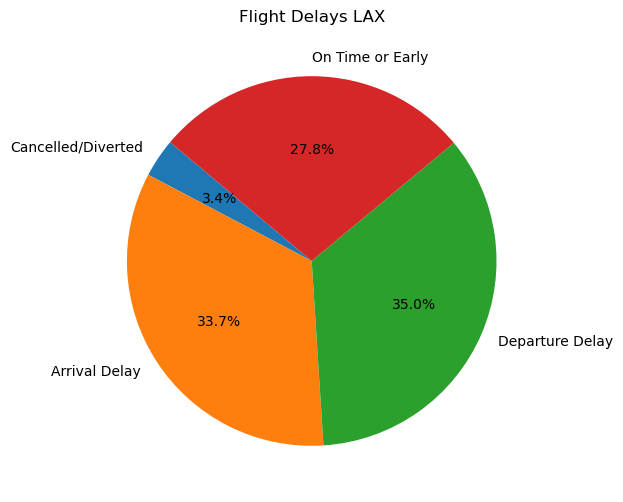

In [55]:
 #Convert relevant columns to numeric, forcing non-numeric values to NaN
for col in ['CANCELLED', 'DIVERTED', 'ARR_DELAY', 'DEP_DELAY']:
    lax_data[col] = pd.to_numeric(lax_data[col], errors='coerce')

# Aggregate data for pie chart
total_cancelled_diverted = (lax_data['CANCELLED'] > 0).sum() + (lax_data['DIVERTED'] > 0).sum()
total_arrival_delay = (lax_data['ARR_DELAY'] > 0).sum()
total_departure_delay = (lax_data['DEP_DELAY'] > 0).sum()

# Total number of flights in the DataFrame
total_flights = len(lax_data)

# Calculate non-delayed flights
non_delayed_flights = total_flights - total_cancelled_diverted - total_arrival_delay - total_departure_delay

# Define categories and their values
categories = ['Cancelled/Diverted', 'Arrival Delay', 'Departure Delay', 'On Time or Early']
values = [total_cancelled_diverted, total_arrival_delay, total_departure_delay, non_delayed_flights]

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
ax.set_title('Flight Delays LAX')

# Save the pie chart to a file
plt.savefig('flight_delays_pie_chart.png', format='png')

# Display the plot (optional)
plt.show()


In [56]:
#Total Number of flights in each category
print(f"Total flights: {total_flights}")
print(f"Cancelled/Diverted: {total_cancelled_diverted}")
print(f"Arrival Delays: {total_arrival_delay}")
print(f"Departure Delays: {total_departure_delay}")
print(f"Non-Delayed Flights: {non_delayed_flights}")

Total flights: 30674
Cancelled/Diverted: 1038
Arrival Delays: 10350
Departure Delays: 10745
Non-Delayed Flights: 8541


## Geo Mapping with GeoAPI

In [57]:
#GeoApify Data
# Credit to Lauren Graves for the APIKEY and JSON Dumps Section
# Import the API key
from config import geoapify_key
# Set the search parameters
target_city = "Los Angeles, California"

params = {
    "text": target_city,
    "apiKey": geoapify_key
}

# Build URL using the geocode endpoint
base_url = "https://api.geoapify.com/v1/geocode/search"

# Run request
response = requests.get(base_url, params=params).json()

# Print the json (pretty printed)
print(json.dumps(response, indent=4, sort_keys=True))

{
    "features": [
        {
            "bbox": [
                -118.6681842,
                33.659541,
                -118.1552983,
                34.337306
            ],
            "geometry": {
                "coordinates": [
                    -118.242766,
                    34.0536909
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "Los Angeles, CA",
                "address_line2": "United States of America",
                "category": "administrative",
                "city": "Los Angeles",
                "country": "United States",
                "country_code": "us",
                "county": "Los Angeles County",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Database License",
                    "sourcename": "openstreetmap",
                    "url": "https://www.openstreetmap.org/copyri

In [58]:
# Latitude/Longitude for Los Angeles 
lat = response["features"][0]["properties"]["lat"]
lon = response["features"][0]["properties"]["lon"]

# Print results
print(f"{target_city}: {lat}, {lon}")

Los Angeles, California: 34.0536909, -118.242766


In [59]:
 # Find LAX
target_city = "Los Angeles International Airport"

params = {
    "text": target_city,
    "apiKey": geoapify_key
}

# Build URL using the geocode endpoint
base_url = "https://api.geoapify.com/v1/geocode/search"

 # Run request
response = requests.get(base_url, params=params).json()

# Print the json (pretty printed)
print(json.dumps(response, indent=4, sort_keys=True))

{
    "features": [
        {
            "bbox": [
                -118.4388687,
                33.931229,
                -118.3787955,
                33.9530738
            ],
            "geometry": {
                "coordinates": [
                    -118.42135906141587,
                    33.94216754999999
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "Los Angeles International Airport",
                "address_line2": "Imperial Highway, Los Angeles, CA 90245, United States of America",
                "city": "Los Angeles",
                "country": "United States",
                "country_code": "us",
                "county": "Los Angeles County",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Database License",
                    "sourcename": "openstreetmap",
                    "url": "https:/

In [60]:
 #Lat/Lon for LAX
lat = response["features"][0]["properties"]["lat"]
lon = response["features"][0]["properties"]["lon"]

# Print results
print(f"{target_city}: {lat}, {lon}")

Los Angeles International Airport: 33.94216754999999, -118.42135906141587


In [61]:
coordinates = {
    "latitude": [-118.4036, -84.4333, -104.6764, -87.9090, -97.0336],
    "longitude": [33.9422, 33.6324, 39.8563, 41.9803, 32.8990],
    "City": ["Los Angeles", "Atlanta", "Denver", "Chicago", "Dallas"],
    "Total Flights": [30674, 52703, 48997, 57769, 12704]
}
coordinates_df = pd.DataFrame(coordinates)
coordinates_df


,latitude,longitude,City,Total Flights
0,-118.4036,33.9422,Los Angeles,30674
1,-84.4333,33.6324,Atlanta,52703
2,-104.6764,39.8563,Denver,48997
3,-87.9090,41.9803,Chicago,57769
4,-97.0336,32.8990,Dallas,12704


In [68]:
# Configure the map
map_plot = coordinates_df.hvplot.points(
    "latitude",
    "longitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Total Flights",
    scale = 0.1,
    color = "City"  
)

# Save Map to a file
plt.savefig('Airport_Geo_Map', format='png')

# Display the map plot
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [latitude,longitude]   (City,Total Flights)

<Figure size 640x480 with 0 Axes>

In [66]:
import hvplot.pandas 
import holoviews as hv
import geoviews as gv

# Sample data
coordinates = {
    "latitude": [-118.4036, -84.4333, -104.6764, -87.9090, -97.0336],
    "longitude": [33.9422, 33.6324, 39.8563, 41.9803, 32.8990],
    "City": ["Los Angeles", "Atlanta", "Denver", "Chicago", "Dallas"],
    "Total Flights": [30674, 52703, 48997, 57769, 12704]
}
coordinates_df = pd.DataFrame(coordinates)

# Create a heatmap dataset
heatmap_df = coordinates_df.copy()
heatmap_df["weight"] = coordinates_df["Total Flights"]

# Create the heat map plot
heatmap = hv.HeatMap(heatmap_df, kdims=["longitude", "latitude"], vdims=["weight"]).opts(
    cmap='Viridis',
    colorbar=True,
    alpha=0.5,
    width=700,
    height=500
)

# Configure the map plot with bounds for the United States
map_plot = coordinates_df.hvplot.points(
    "latitude",
    "longitude",
    geo=True,
    tiles="OSM",
    frame_width=700,
    frame_height=500,
    size="Total Flights",
    scale=0.1,
    color="City",
    xlim=(-125, -66),
    ylim=(24, 50)
)

# Overlay the heat map on top of the existing map
combined_plot = heatmap * map_plot

# Save HeatMap to a file
plt.savefig('Airport_Geo_HeatMap', format='png')

# Display the combined plot
combined_plot


:Overlay
   .HeatMap.I :HeatMap   [longitude,latitude]   (weight)
   .WMTS.I    :WMTS   [Longitude,Latitude]
   .Points.I  :Points   [latitude,longitude]   (City,Total Flights)

<Figure size 640x480 with 0 Axes>